In [14]:
import os
import h5py
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal

data_dir='/home/jovyan/RossData/'


import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


# make sure we're dealing with the most recent version of any code we're using
%load_ext autoreload
%autoreload 2
%cd /home/jovyan/RossData/
%pwd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/jovyan/RossData


'/home/jovyan/RossData'

In [15]:
%pwd

filename = 'processed_ATL07-02_20181014031222_02370101_001_01.h5'
# See what is in a particular file
# !h5ls -r processed_ATL07-01_20181202120647_09910101_001_01.h5

In [27]:
%pwd
f = h5py.File(filename, 'r')
lat = f['/gt1l/sea_ice_segments/latitude'][:]
lon = f['/gt1l/sea_ice_segments/longitude'][:]
conc = f['/gt1l/sea_ice_segments/stats/ice_conc'][:]
SSH = f['/gt1l/sea_ice_segments/heights/height_segment_height'][:]
qual = f['/gt1l/sea_ice_segments/heights/height_segment_fit_quality_flag'][:]
ssh_flag=f['/gt1l/sea_ice_segments/heights/height_segment_ssh_flag'][:]
rms=f['/gt1l/sea_ice_segments/heights/height_segment_rms'][:]
conf=f['/gt1l/sea_ice_segments/heights/height_segment_confidence'][:]

concr = f['/gt1r/sea_ice_segments/stats/ice_conc'][:]
latr = f['/gt1r/sea_ice_segments/latitude'][:]
lonr = f['/gt1r/sea_ice_segments/longitude'][:]
SSHr = f['/gt1r/sea_ice_segments/heights/height_segment_height'][:]
qualr = f['/gt1r/sea_ice_segments/heights/height_segment_fit_quality_flag'][:]
ssh_flagr=f['/gt1r/sea_ice_segments/heights/height_segment_ssh_flag'][:]
rmsr=f['/gt1r/sea_ice_segments/heights/height_segment_rms'][:]
confr=f['/gt1r/sea_ice_segments/heights/height_segment_confidence'][:]

In [34]:
arr_l = pd.DataFrame({'lat': lat,'lon': lon, 'conc': conc,'SSH': SSH, 'qual': qual, 'ssh_flag': ssh_flag, 'rms': rms,  'conf': conf}, columns=['lat','lon','conc','SSH','qual','ssh_flag','rms','conf'])
arr_l.head()



,lat,lon,conc,SSH,qual,ssh_flag,rms,conf
0,-76.449477,175.396719,93.709190,0.289292,1,0,0.009045,0.024087
1,-76.449477,175.396719,93.709198,0.289292,1,0,0.009045,0.024087
2,-76.449477,175.396719,93.709183,0.289292,1,0,0.009045,0.024087
3,-76.449398,175.396664,93.708824,0.277335,1,0,0.006238,0.031227
4,-76.449317,175.396606,93.708481,0.280584,1,0,0.005302,0.017948


In [35]:
arr_r = pd.DataFrame({'lat': latr,'lon': lonr, 'conc': concr,'SSH': SSHr, 'qual': qualr, 'ssh_flag': ssh_flagr, 'rms': rmsr,  'conf': confr}, columns=['lat','lon','conc','SSH','qual','ssh_flag','rms','conf'])
arr_r.head()

,lat,lon,conc,SSH,qual,ssh_flag,rms,conf
0,-77.661495,176.327401,77.0,3.402823e+38,-1,0,3.402823e+38,3.402823e+38
1,-77.657824,176.324331,77.0,3.402823e+38,-1,0,3.402823e+38,3.402823e+38
2,-77.653395,176.320633,77.0,3.402823e+38,-1,0,3.402823e+38,3.402823e+38
3,-77.649227,176.317158,77.0,3.402823e+38,-1,0,3.402823e+38,3.402823e+38
4,-77.645461,176.314013,77.0,3.402823e+38,-1,0,3.402823e+38,3.402823e+38


In [33]:
arr_l.describe()


,lat,lon,conc,SSH,qual,ssh_flag,rms,conf
count,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3.450000e+03,3.450000e+03
mean,-75.824239,174.975408,89.149803,0.204038,0.999420,0.015362,inf,inf
std,0.199979,0.130801,1.238927,0.040470,0.086822,0.123007,inf,inf
min,-76.449477,174.603593,88.090523,0.094799,-1.000000,0.000000,2.023770e-03,7.439100e-03
25%,-75.949970,174.872711,88.225971,0.178859,1.000000,0.000000,6.474567e-03,1.707597e-02
50%,-75.807111,174.962657,88.762150,0.201561,1.000000,0.000000,7.939522e-03,2.056871e-02
75%,-75.667185,175.056112,89.575146,0.225040,1.000000,0.000000,9.690400e-03,2.424367e-02
max,-75.233400,175.396719,95.404900,0.831967,3.000000,1.000000,3.402823e+38,3.402823e+38


In [32]:
arr_r.describe()

,lat,lon,conc,SSH,qual,ssh_flag,rms,conf
count,4092.000000,4092.000000,4092.000000,4.092000e+03,4092.000000,4092.000000,4.092000e+03,4.092000e+03
mean,-75.886552,175.020606,89.532379,inf,0.693060,0.035679,inf,inf
std,0.361385,0.246837,2.574010,inf,0.720968,0.185512,inf,inf
min,-77.661495,174.473273,76.000000,2.449557e-03,-1.000000,0.000000,1.530188e-03,7.190528e-03
25%,-76.022240,174.870494,88.241335,1.808244e-01,1.000000,0.000000,6.032070e-03,1.843836e-02
50%,-75.831836,174.979228,88.994057,2.027422e-01,1.000000,0.000000,7.663791e-03,2.222449e-02
75%,-75.662890,175.104574,90.088552,2.434775e-01,1.000000,0.000000,1.008104e-02,2.771118e-02
max,-75.014167,176.327401,96.153946,3.402823e+38,1.000000,1.000000,3.402823e+38,3.402823e+38


[0, 0.1, 0, 0.1]

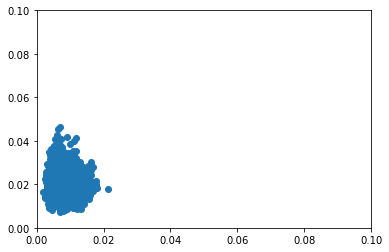

In [26]:
plt.scatter(arr_l.rms,arr_l.conf);
plt.axis([0,0.1,0,0.1])

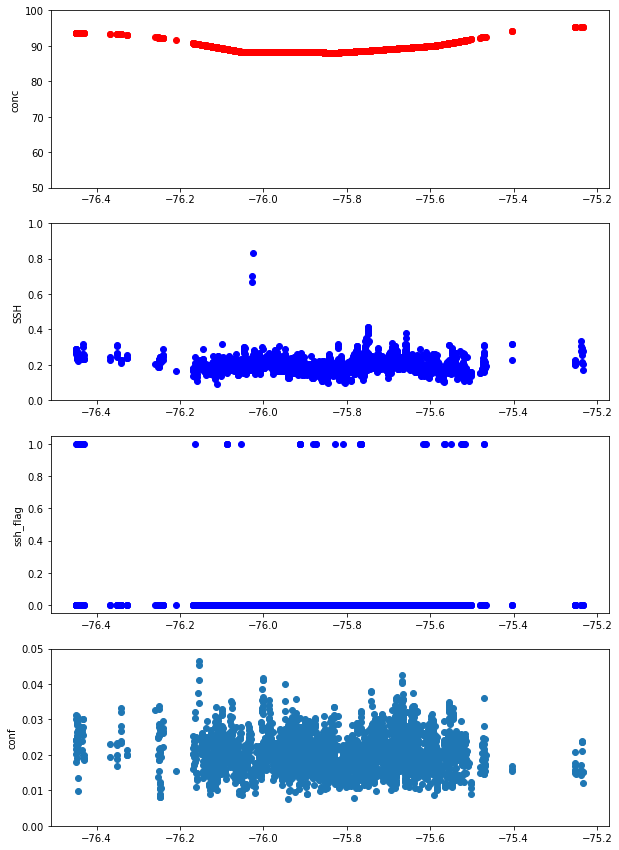

In [8]:

plt.figure(figsize=(10, 15))
plt.subplot(411)
plt.plot(lat,conc,'ro')
plt.ylabel('conc')
plt.ylim(50,100)

plt.subplot(412)
plt.plot(lat,SSH,'bo')
plt.ylabel('SSH')
plt.ylim(0,1)

plt.subplot(413)
plt.plot(lat,ssh_flag,'bo')
plt.ylabel('ssh_flag')

plt.subplot(414)
plt.plot(lat,conf,'o')
plt.ylabel('conf')
plt.ylim(0,0.05)

plt.show()

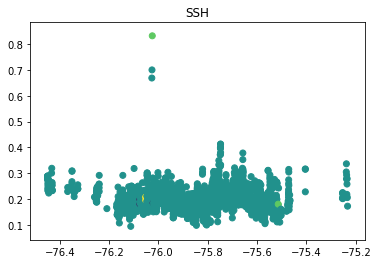

In [7]:
plt.scatter(lat,SSH);
plt.title('SSH');

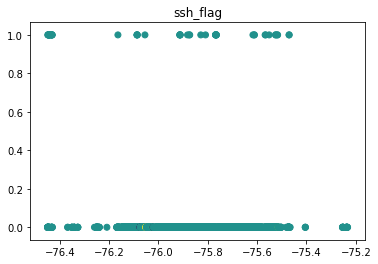

In [8]:
plt.scatter(lat,ssh_flag,c=qual);
plt.title('ssh_flag');

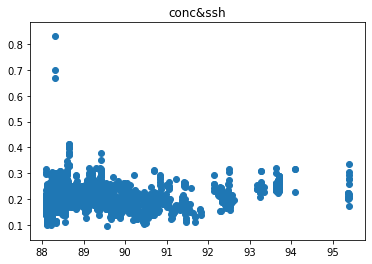

In [9]:
plt.scatter(conc,SSH);
plt.title('conc&ssh');

In [42]:
print(rms[SSH>0.5])
print(ssh_flag[SSH>0.5])

[0.01007063 0.01299532 0.01054194]
[0 0 0]


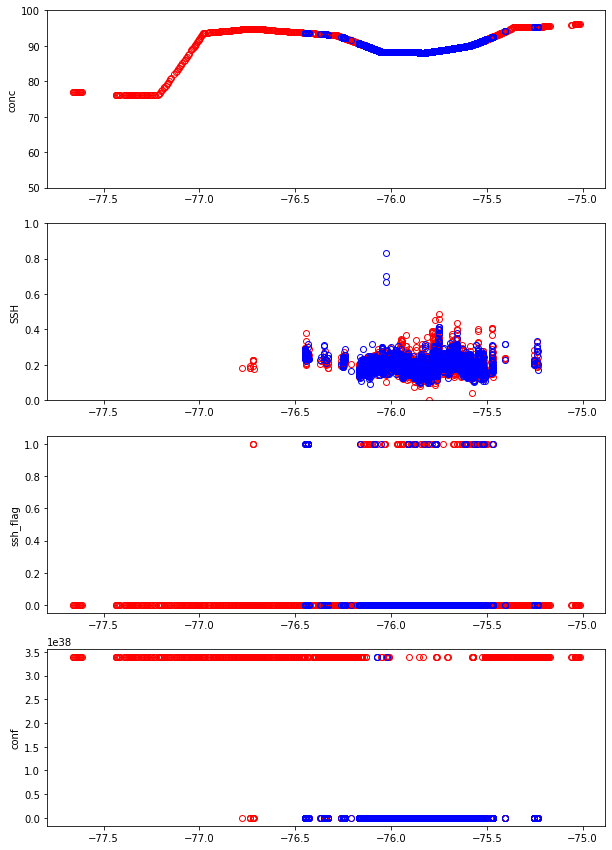

In [19]:
plt.figure(figsize=(10, 15),)
plt.subplot(411)
plt.plot(latr,concr,'ro', mfc='none')
plt.plot(lat,conc,'bo', mfc='none')
plt.ylabel('conc')
plt.ylim(50,100)


plt.subplot(412)
plt.plot(latr,SSHr,'ro', mfc='none')
plt.plot(lat,SSH,'bo', mfc='none')
plt.ylabel('SSH')
plt.ylim(0,1)


plt.subplot(413)
plt.plot(latr,ssh_flagr,'ro', mfc='none')
plt.plot(lat,ssh_flag,'bo', mfc='none')
plt.ylabel('ssh_flag')


plt.subplot(414)
plt.plot(latr,confr,'ro', mfc='none')
plt.plot(lat,conf,'bo', mfc='none')
plt.ylabel('conf')
#plt.ylim(0,0.05)


plt.show()

In [25]:
SSH_comset_lat=lat[SSH>0]
print(SSH_comset_lat)

[-76.44947652 -76.44947652 -76.44947652 ... -75.2349356  -75.23443083
 -75.2334003 ]


In [20]:
print(max(conf))

3.4028235e+38


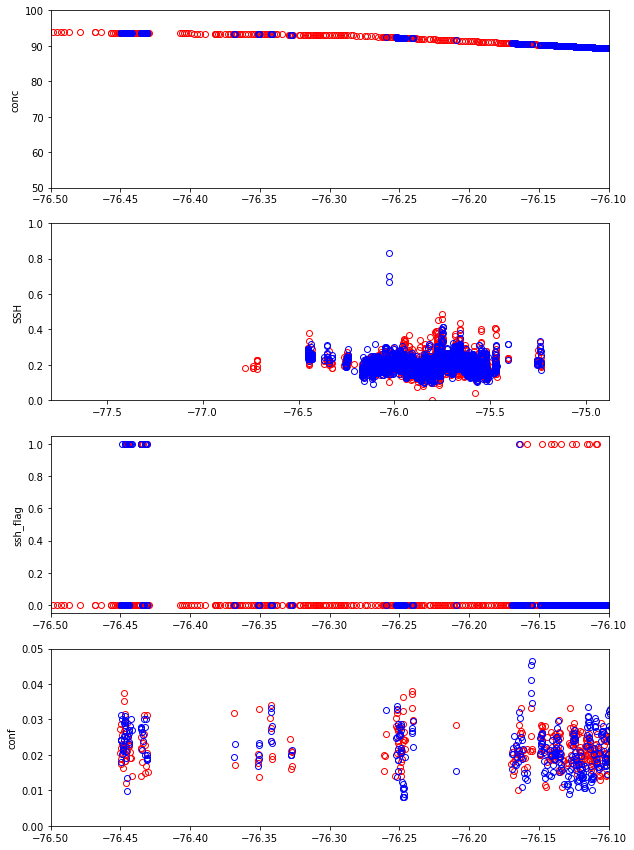

In [17]:
plt.figure(figsize=(10, 15),)
plt.subplot(411)
plt.plot(latr,concr,'ro', mfc='none')
plt.plot(lat,conc,'bo', mfc='none')
plt.ylabel('conc')
plt.ylim(50,100)
plt.xlim(-76.5,-76.1)

plt.subplot(412)
plt.plot(latr,SSHr,'ro', mfc='none')
plt.plot(lat,SSH,'bo', mfc='none')
plt.ylabel('SSH')
plt.ylim(0,1)
plt.xlim(-76.5,-76.1)

plt.subplot(413)
plt.plot(latr,ssh_flagr,'ro', mfc='none')
plt.plot(lat,ssh_flag,'bo', mfc='none')
plt.ylabel('ssh_flag')
plt.xlim(-76.5,-76.1)

plt.subplot(414)
plt.plot(latr,confr,'ro', mfc='none')
plt.plot(lat,conf,'bo', mfc='none')
plt.ylabel('conf')
plt.ylim(0,0.05)
plt.xlim(-76.5,-76.1)

plt.show()